# Clustering

In [1]:
#import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans

In [2]:
#Loading dataset
import pandas as pd
data = 'พื้นที่_new.xlsx'
df = pd.read_excel(data)
df

,Province,Distance( km),Walking Time ( min )
0,ภูเก็ต,0.30,4
1,ภูเก็ต,0.70,9
2,ภูเก็ต,0.30,4
3,ภูเก็ต,0.40,5
4,ภูเก็ต,0.50,6
...,...,...,...
351,สุราษฎร์ธานี,1.10,14
352,สุราษฎร์ธานี,1.10,13
353,สุราษฎร์ธานี,0.55,7
354,สุราษฎร์ธานี,0.21,3


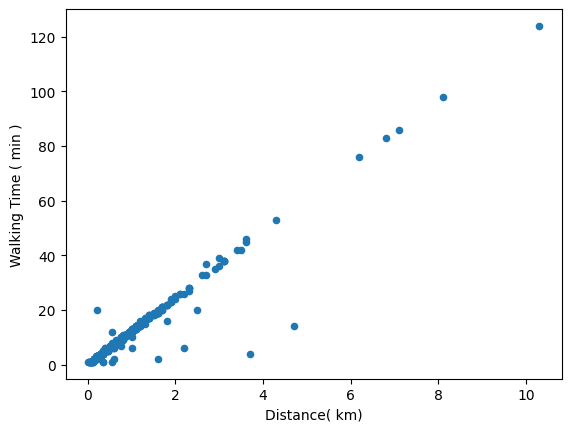

In [4]:
df.plot(kind='scatter', x='Distance( km)',y='Walking Time ( min )')
plt.show()

In [5]:
df.info() #แสดงสรุปข้อมูลรวมถึงเพื่อดู missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province              356 non-null    object 
 1   Distance( km)         356 non-null    float64
 2   Walking Time ( min )  356 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 8.5+ KB


In [6]:
df.describe() #ดูข้อมูลเบื้องต้นเกี่ยวกับ Dataset

,Distance( km),Walking Time ( min )
count,356.000000,356.000000
mean,0.941467,11.238764
std,1.120262,13.269759
min,0.008100,1.000000
25%,0.350000,4.000000
50%,0.600000,7.000000
75%,1.100000,14.000000
max,10.300000,124.000000


In [7]:
df.Province .value_counts() #แสดงจำนวนสาขาแต่ละจังหวัด

ภูเก็ต          91
หากใหญ่         85
สมุทรสาคร       82
สุราษฎร์ธานี    50
ระยอง           48
Name: Province, dtype: int64

In [9]:
df = df.drop(['Province'], axis =1) #drop จังหวัดเนื่องจากไม่มีผลต่อการทำนาย

In [10]:
#Scaling the dataset 
mms = MinMaxScaler() 
mms.fit(df)
data_transformed = mms.transform(df)

In [11]:
data_transformed

array([[0.02836211, 0.02439024],
       [0.06722763, 0.06504065],
       [0.02836211, 0.02439024],
       [0.03807849, 0.03252033],
       [0.04779487, 0.04065041],
       [0.04779487, 0.04878049],
       [0.09637676, 0.08943089],
       [0.04293668, 0.04065041],
       [0.00990099, 0.        ],
       [0.02739047, 0.02439024],
       [0.29070434, 0.30894309],
       [0.02836211, 0.02439024],
       [0.05265306, 0.05691057],
       [0.03807849, 0.04065041],
       [0.04293668, 0.04065041],
       [0.06722763, 0.05691057],
       [0.05265306, 0.04878049],
       [0.00203072, 0.        ],
       [0.00892935, 0.        ],
       [0.01184427, 0.00813008],
       [0.01573082, 0.00813008],
       [0.07208582, 0.06504065],
       [0.05265306, 0.04878049],
       [0.0332203 , 0.02439024],
       [0.02836211, 0.02439024],
       [0.03807849, 0.03252033],
       [0.01378754, 0.00813008],
       [0.03807849, 0.03252033],
       [0.09637676, 0.09756098],
       [0.04293668, 0.04065041],
       [0.

In [12]:
#convert to Datafame 
data_transformed = pd.DataFrame(data_transformed, columns = ['Distance( km)', 'Walking Time ( min )'])
data_transformed

,Distance( km),Walking Time ( min )
0,0.028362,0.024390
1,0.067228,0.065041
2,0.028362,0.024390
3,0.038078,0.032520
4,0.047795,0.040650
...,...,...
351,0.106093,0.105691
352,0.106093,0.097561
353,0.052653,0.048780
354,0.019617,0.016260


In [13]:
df.columns

Index(['Distance( km)', 'Walking Time ( min )'], dtype='object')

<AxesSubplot: xlabel='Distance( km)', ylabel='Walking Time ( min )'>

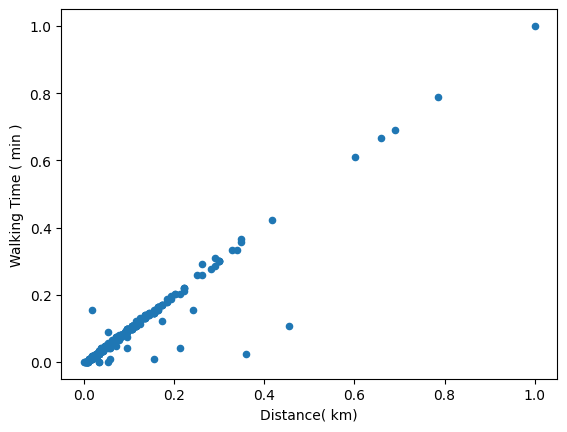

In [15]:
#Repltting dataset after scalling
data_transformed.plot(kind = 'scatter' , x='Distance( km)', y = 'Walking Time ( min )')

In [16]:
#Elbow method to minimize WSS (Within-cluster Sum of Square)
#https://www.kdnuggets.com/2019/05/golden-goose-cohort-analysis.html/2
#WSS เป็นหนึ่งในวิธีที่ใช้ในการ Clustering ในการหาระยะห่างระหว่างจุด
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
#WSS means the sum of distances between the points and the corresponding centroids for each cluster 

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

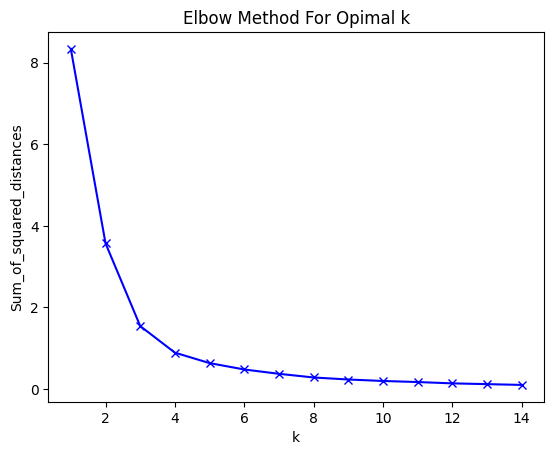

In [17]:
#Plotting the Elbow Curve by k (number of clusters)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Opimal k')
plt.show()

In [18]:
#Clustering the dataset with k=3
km3 = KMeans(n_clusters=3)
km3 =km3.fit(df)

In [19]:
print(km3.labels_)

[0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 2 2 0 0 2 0 0 0 0 0 2 2 0 0 0 2 2 0 2 0
 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 0 2 2 2 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0
 0 2 2 2 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 2 0 2 2 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 2 0 0 0 0 1 0 0 1 2 0 0
 0 2 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 1 0 2 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0]


In [20]:
#how many observations are in each cluster
print(km3.labels_)
result=km3.labels_
result=pd.DataFrame(result, columns=['cluster'])
result.groupby('cluster').size()

[0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 2 2 0 0 2 0 0 0 0 0 2 2 0 0 0 2 2 0 2 0
 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 0 2 2 2 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0
 0 2 2 2 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 2 0 2 2 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 2 0 0 0 0 1 0 0 1 2 0 0
 0 2 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 1 0 2 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0]


cluster
0    293
1      5
2     58
dtype: int64

In [21]:
#the centroid of cluster
centroids = km3.cluster_centers_
centroids=pd.DataFrame(centroids, columns=['centroids_Distance', 'centroids_Walking Time (min )'])
centroids

,centroids_Distance,centroids_Walking Time (min )
0,0.597823,6.935154
1,7.700000,93.400000
2,2.094828,25.896552


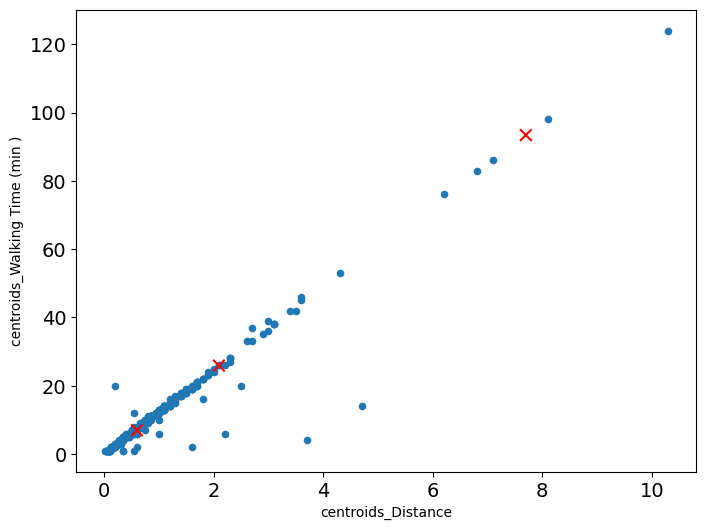

In [23]:
#Draw the centroid of cluster
s1=df.plot(figsize=[8,6], kind='scatter', x='Distance( km)', y='Walking Time ( min )')
centroids.plot(ax=s1, kind='scatter', x='centroids_Distance', y='centroids_Walking Time (min )', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()